In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
def metric_calculation(data, model, metric_name, metric_value):
    
    ## load ground truth & predictions
    gt=np.array(data['label'])
    if model == 'heuristic':
        if metric_name=='degree':
            pred=np.array(data['min_angle'])<=metric_value
        elif metric_name == 'distance':
            pred=np.array(data['euc_dist'])>=metric_value
    else:
        pred=np.load(f'{metric_name}/{model}_{metric_name}_{metric_value}.npy')
        pred=np.array([int(i.replace('<|eot_id|>', '')\
                           .replace('</s>', '')\
                           .split('Label:')[1]\
                           .strip()) for i in pred])

    ## accuracy calculation
    accuracy=accuracy_score(gt, pred)
    _,fpc,fnc,_=confusion_matrix(gt, pred).ravel()
    fpr=fpc/len(data)
    fnr=fnc/len(data)
    
    return pred,accuracy,fpr,fnr

In [77]:
ds = load_dataset("beanham/spatial_join_dataset")
test=ds['test']
models=['heuristic','llama3','mistral']
metric_names=['degree', 'distance']
predictions={}
results=[]
for model in models:
    for metric_name in metric_names:
        if metric_name=='degree':
            metric_values=[1,2,5,10,20]
        elif metric_name=='distance':
            metric_values=[1,2,3,4,5]        
        for metric_value in metric_values:
            pred,acc,fpr,fnr=metric_calculation(test, model,metric_name,metric_value)
            results.append([model, metric_name, metric_value, acc, fpr, fnr])
            predictions[f'{model}_{metric_name}_{metric_value}']=pred
results=pd.DataFrame(results, columns=['model','metric','metric_value','acc','fpr','fnr'])
results['metric_index']=[f'metric_{i}'for i in range(1,6)]*6
degree_results=results[results['metric']=='degree'].reset_index(drop=True)
distance_results=results[results['metric']=='distance'].reset_index(drop=True)

## Visualization

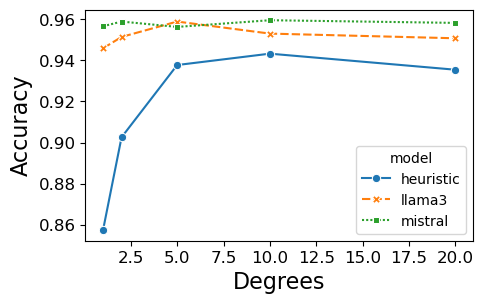

In [148]:
plt.figure(figsize=(5,3))
sns.lineplot(data=degree_results, x="metric_value", y="acc",style="model",hue="model",markers=True)
plt.xlabel('Degrees', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
pass

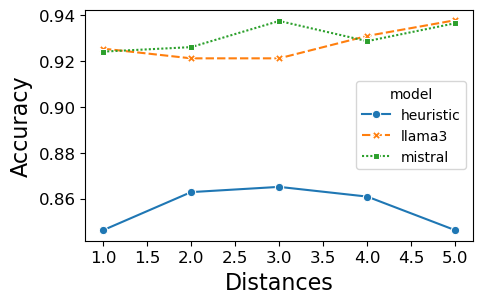

In [142]:
plt.figure(figsize=(5,3))
sns.lineplot(data=distance_results, x="metric_value", y="acc",style="model",hue="model",markers=True)
plt.xlabel('Distances', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
pass

## Error Analysis

In [151]:
positive = test.filter(lambda x: ((x['label']==1) & (x['min_angle']<=metric_value)))
negative = test.filter(lambda x: ((x['label']==0) & (x['min_angle']>metric_value)))

Filter:   0%|          | 0/3069 [00:00<?, ? examples/s]

Filter:   0%|          | 0/3069 [00:00<?, ? examples/s]

In [153]:
positive

Dataset({
    features: ['sidewalk', 'road', 'min_angle', 'hausdorff_dist', 'euc_dist', 'max_area', 'label'],
    num_rows: 1791
})

In [160]:
a=ds['test']

In [161]:
a.add_column()

Dataset({
    features: ['sidewalk', 'road', 'min_angle', 'hausdorff_dist', 'euc_dist', 'max_area', 'label'],
    num_rows: 3069
})

In [155]:
a=test.copy()

AttributeError: 'Dataset' object has no attribute 'copy'

In [ ]:
a

In [144]:
ds = load_dataset("beanham/spatial_join_dataset")
test=ds['test']
models=['heuristic','llama3','mistral']
metric_names=['degree', 'distance']
predictions={}
results=[]
for model in models:
    for metric_name in metric_names:
        if metric_name=='degree':
            metric_values=[1,2,5,10,20]
            var_name='min_angle'
        elif metric_name=='distance':
            metric_values=[1,2,3,4,5]
            var_name='euc_dist'
            
        for metric_value in metric_values:
            pred,acc,fpr,fnr=metric_calculation(test, model,metric_name,metric_value)

            ## error analysis
            new_test = ds['test'].add_column("pred", pred)
            positive = new_test.filter(lambda x: ((x['label']==1) & (x['min_angle']<=metric_value)))
            negative = new_test.filter(lambda x: ((x['label']==0) & (x['min_angle']>metric_value)))

            ## save results
            results.append([model, metric_name, metric_value, acc, fpr, fnr])
            predictions[f'{model}_{metric_name}_{metric_value}']=pred            

results=pd.DataFrame(results, columns=['model','metric','metric_value','acc','fpr','fnr'])
results['metric_index']=[f'metric_{i}'for i in range(1,6)]*6
degree_results=results[results['metric']=='degree'].reset_index(drop=True)
distance_results=results[results['metric']=='distance'].reset_index(drop=True)

Dataset({
    features: ['sidewalk', 'road', 'min_angle', 'hausdorff_dist', 'euc_dist', 'max_area', 'label'],
    num_rows: 3069
})

In [162]:
new_test = ds['test'].add_column("pred", pred)

In [163]:
new_test

Dataset({
    features: ['sidewalk', 'road', 'min_angle', 'hausdorff_dist', 'euc_dist', 'max_area', 'label', 'pred'],
    num_rows: 3069
})